# <center>利用Markov Chain算法计算圆面积，寻找使计算误差最小的最优最大步幅，并与均匀采样法比较效率
<center>林宇宸 19720182203933
<center>2019.12

## 1.研究背景

### 马尔科夫链

### 蒙特卡罗方法

### MCMC方法

马尔可夫链蒙特卡洛（英语：Markov chain Monte Carlo，MCMC）方法（含随机游走蒙特卡洛方法）是一组用马氏链从随机分布取样的算法，之前步骤的作为底本。步数越多，结果越好。

创建一个具有期望属性的马氏链并非难事，难的是如何决定通过多少步可以达到在许可误差内的稳定分布。一个好的马氏链具有快速混合——从开始阶段迅速获得的一个稳定状态——请参考马氏链最大时间。

因于初始样本，最常见的MCMC取样只能近似得到分布。复杂的MCMC改进算法如过往耦合，但是会消耗更多的计算资源和时间。

典型用法是模拟一个随机行走的行人来进行路径优化等。每一步都算作是一个状态。而统计经过次数最多的地方将在下一步中更有可能为目的地。马氏蒙特卡洛方法是一种结合了蒙特卡罗法的解决方案。但不同于以往的蒙特卡洛integration是统计独立的，MCMC中的是统计相关的。

## 2.研究目的

## 3.利用MCMC算法计算圆的面积 
 - 假设此时最大步幅为0.2

运行结果如下

蒙卡结果： 0.7484 
理论结果： 0.7853981633974483


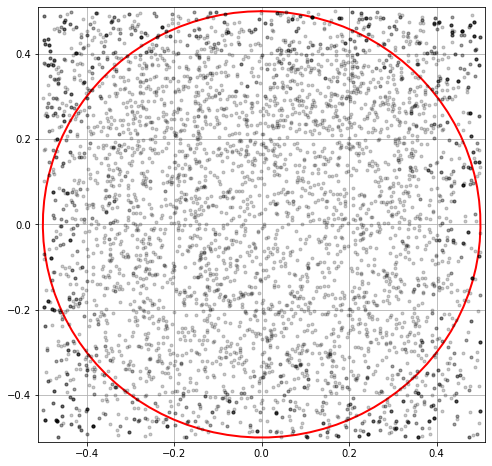

In [1]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
x,y=0,0
delta=0.2 #最大步幅
n_trials=5000
Pos=np.zeros((n_trials,2))
n_hits=0
for i in np.arange(n_trials):
    del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
    if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
        x,y=x+del_x,y+del_y
    if x**2+y**2<0.5*0.5:
        n_hits+=1
    Pos[i,0]=x
    Pos[i,1]=y
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)

plt.plot(Pos[:,0],Pos[:,1],"k.",alpha=0.2)
print("蒙卡结果：",n_hits/n_trials,"\n理论结果：",np.pi*0.5*0.5)

In [ ]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
bestcircle=[]
plt.figure(figsize=(16, 8))
for k in range(1,1500,1):
    delta=k*0.001
    x,y=0,0
    n_trials=500
    n_hits=0
    for i in np.arange(n_trials):
        del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
        if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
            x,y=x+del_x,y+del_y
        if x**2+y**2<0.5*0.5:
            n_hits+=1
    bestcircle.append(np.abs((n_hits/n_trials)-np.pi*0.5*0.5))
plt.xlabel("$The Biggest Strides$")
plt.ylabel("$Error$")
plt.title("$The Biggest Strides-Error$")
plt.plot(bestcircle,'r')
